In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Importing and cleaning up column indices for ease of use. Added frequency column.
tran = pd.read_csv('data/transfusion.csv')
tran.columns = ['months_since_last', 'total_times_donated', 'total_cc_blood_donated', 'months_since_first', 'donated_march_2007']
tran = tran.reindex(columns=['months_since_first', 'months_since_last', 'total_times_donated', 'total_cc_blood_donated', 'donated_march_2007'])
tran['frequency'] = tran.months_since_first / tran.total_times_donated

### Is frequency of visits a significant factor on returning?
$H_{0}$: There is no difference in mean frequency between those who returned in March 2007 and those who did not.

$H_{A}$: Those who returned in March 2007 have a lower mean frequency (more often).

$\alpha$ < 0.05

In [3]:
# Subsetting the data by whether or not the individual returned.
tran_2007 = tran[tran.donated_march_2007 == 1]
tran_no2007 = tran[tran.donated_march_2007 == 0]

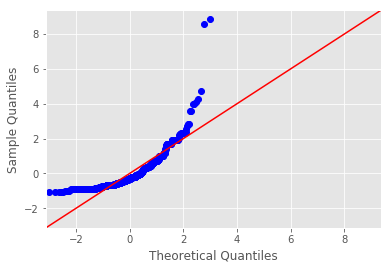

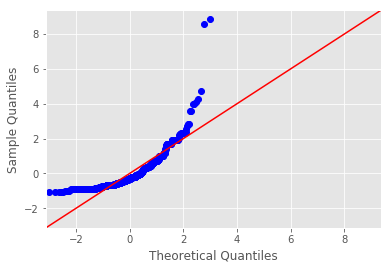

In [4]:
n = len(tran.frequency)
mean_sample = tran.frequency.mean()
sd_sample = tran.frequency.std()
z = (tran.frequency - mean_sample) / sd_sample
sm.qqplot(z, line='45')

The quantile plots shows skewing to the right.

In [5]:
t, p = stats.ttest_1samp(tran_2007.frequency, mean_sample)

In [6]:
t

-10.618415497577418

In [7]:
# Divided by 2 for a one-tailed test.
p / 2

5.419921304941793e-21

In [8]:
t = (tran_2007.frequency.mean() - mean_sample) / (sd_sample/np.sqrt(n))
t

-12.329791905356641

In [9]:
n = len(tran_2007.frequency)
t_critical = stats.t.ppf(0.05, n - 1)
t_critical

-1.6535080018001145

In [1]:
# pd.crosstab(tran.frequency, tran.donated_march_2007).plot(kind='bar', stacked=True)
# plt.locator_params(axis='x', nbins=20)
# plt.ylim([0,30])

While the data is heavily skewed, the t-test is relatively robust in dealing with skewed distributions. In this instance, we reject the null hypothesis as |$t$| > |$t^{*}$|. This means returners are more frequent donaters in general. Visualizing as a stacked bar graph shows the relationship. The lower the frequency, the greater the number of March 2007 donaters.

### Is time since last visit a significant factor on returning?
$H_{0}$: There is no difference in mean time since last visit between returners and non-returners.

$H_{A}$: There is a difference in mean time since last visit between returners and non-returners.

$\alpha$ < 0.05

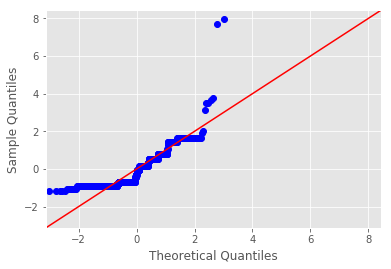

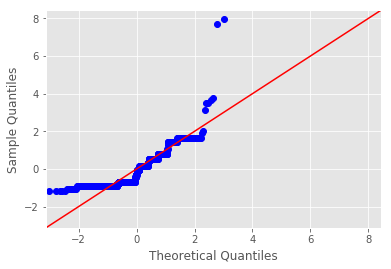

In [11]:
n = len(tran.months_since_last)
mean_sample = tran.months_since_last.mean()
sd_sample = tran.months_since_last.std()
z = (tran.months_since_last - mean_sample) / sd_sample
sm.qqplot(z, line='45')

In [12]:
mean_2007 = tran_2007.months_since_last.mean()
mean_no2007 = tran_no2007.months_since_last.mean()
sd_2007 = tran_2007.months_since_last.std()
sd_no2007 = tran_no2007.months_since_last.std()
n_2007 = len(tran_2007.months_since_last)
n_no2007 = len(tran_no2007.months_since_last)

In [13]:
t = np.absolute(mean_2007 - mean_no2007) / np.sqrt(((sd_2007 ** 2) / n_2007) + ((sd_no2007 ** 2) / n_no2007))
t

10.143923172213576

In [14]:
t_crit = stats.t.ppf(0.05 / 2, n_2007 + n_no2007 - 2)
t_crit

-1.9631490506753435

As |$t$| > |$t^{*}$|, we reject the null hypothesis. There is a statistically significant difference between returners and non-returners based on the last time they visited.

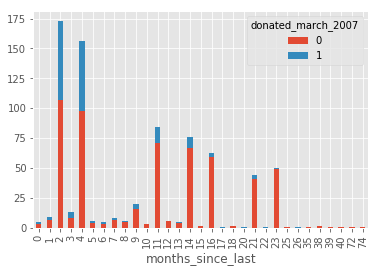

In [15]:
pd.crosstab(tran.months_since_last, tran.donated_march_2007).plot(kind='bar', stacked=True)

### Is time since the first visit a factor on returning?
$H_{0}$: There is no difference in mean time since first visit between returners and non-returners.

$H_{A}$: There is a difference in mean time since first visit between returners and non-returners.

$\alpha$ < 0.05

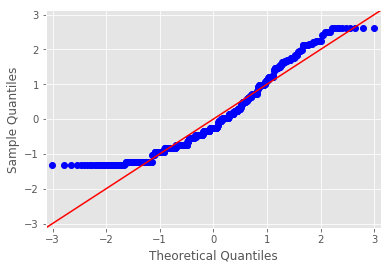

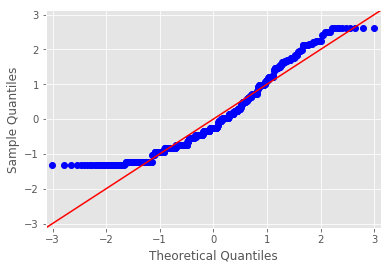

In [16]:
n = len(tran.months_since_first)
mean_sample = tran.months_since_first.mean()
sd_sample = tran.months_since_first.std()
z = (tran.months_since_first - mean_sample) / sd_sample
sm.qqplot(z, line='45')

In [17]:
mean_2007 = tran_2007.months_since_first.mean()
mean_no2007 = tran_no2007.months_since_first.mean()
sd_2007 = tran_2007.months_since_first.std()
sd_no2007 = tran_no2007.months_since_first.std()
n_2007 = len(tran_2007.months_since_first)
n_no2007 = len(tran_no2007.months_since_first)

In [18]:
t = np.absolute(mean_2007 - mean_no2007) / np.sqrt(((sd_2007 ** 2) / n_2007) + ((sd_no2007 ** 2) / n_no2007))
t

1.0009472412857847

In [19]:
t_crit = stats.t.ppf(0.05 / 2, n_2007 + n_no2007 - 2)
t_crit

-1.9631490506753435

As |$t$| < |$t^{*}$|, we cannot reject the null hypothesis. There is no statistically significant difference between returners and non-returners based on the first time they visited.

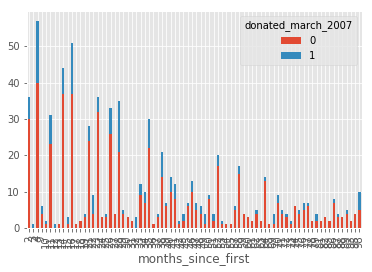

In [20]:
pd.crosstab(tran.months_since_first, tran.donated_march_2007).plot(kind='bar', stacked=True)

### Is total number of visits a factor on returning?
$H_{0}$: There is no difference in mean time since first visit between returners and non-returners.

$H_{A}$: There is a difference in mean time since first visit between returners and non-returners.

$\alpha$ < 0.05

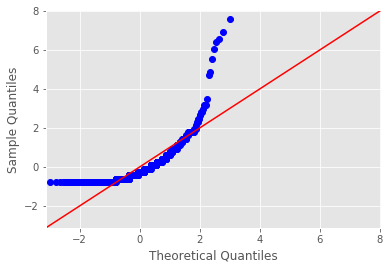

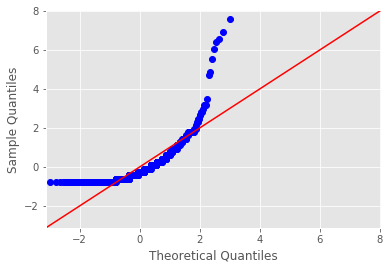

In [21]:
n = len(tran.total_times_donated)
mean_sample = tran.total_times_donated.mean()
sd_sample = tran.total_times_donated.std()
z = (tran.total_times_donated - mean_sample) / sd_sample
sm.qqplot(z, line='45')

In [22]:
mean_2007 = tran_2007.total_times_donated.mean()
mean_no2007 = tran_no2007.total_times_donated.mean()
sd_2007 = tran_2007.total_times_donated.std()
sd_no2007 = tran_no2007.total_times_donated.std()
n_2007 = len(tran_2007.total_times_donated)
n_no2007 = len(tran_no2007.total_times_donated)

In [23]:
t = np.absolute(mean_2007 - mean_no2007) / np.sqrt(((sd_2007 ** 2) / n_2007) + ((sd_no2007 ** 2) / n_no2007))
t

4.722919325269881

In [24]:
t_crit = stats.t.ppf(0.05 / 2, n_2007 + n_no2007 - 2)
t_crit

-1.9631490506753435

As |$t$| > |$t^{*}$|, we reject the null hypothesis. There is a statistically significant difference between returners and non-returners based on total number of visits.

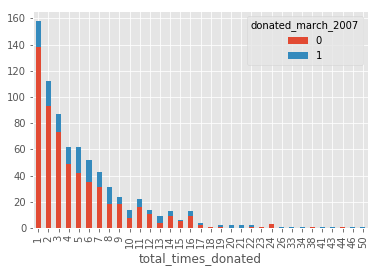

In [25]:
pd.crosstab(tran.total_times_donated, tran.donated_march_2007).plot(kind='bar', stacked=True)

In [26]:
tran.head()

,months_since_first,months_since_last,total_times_donated,total_cc_blood_donated,donated_march_2007,frequency
0,98,2,50,12500,1,1.960000
1,28,0,13,3250,1,2.153846
2,35,1,16,4000,1,2.187500
3,45,2,20,5000,1,2.250000
4,77,1,24,6000,0,3.208333


/Users/josephpetersen/miniconda3/envs/springboard/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/josephpetersen/miniconda3/envs/springboard/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


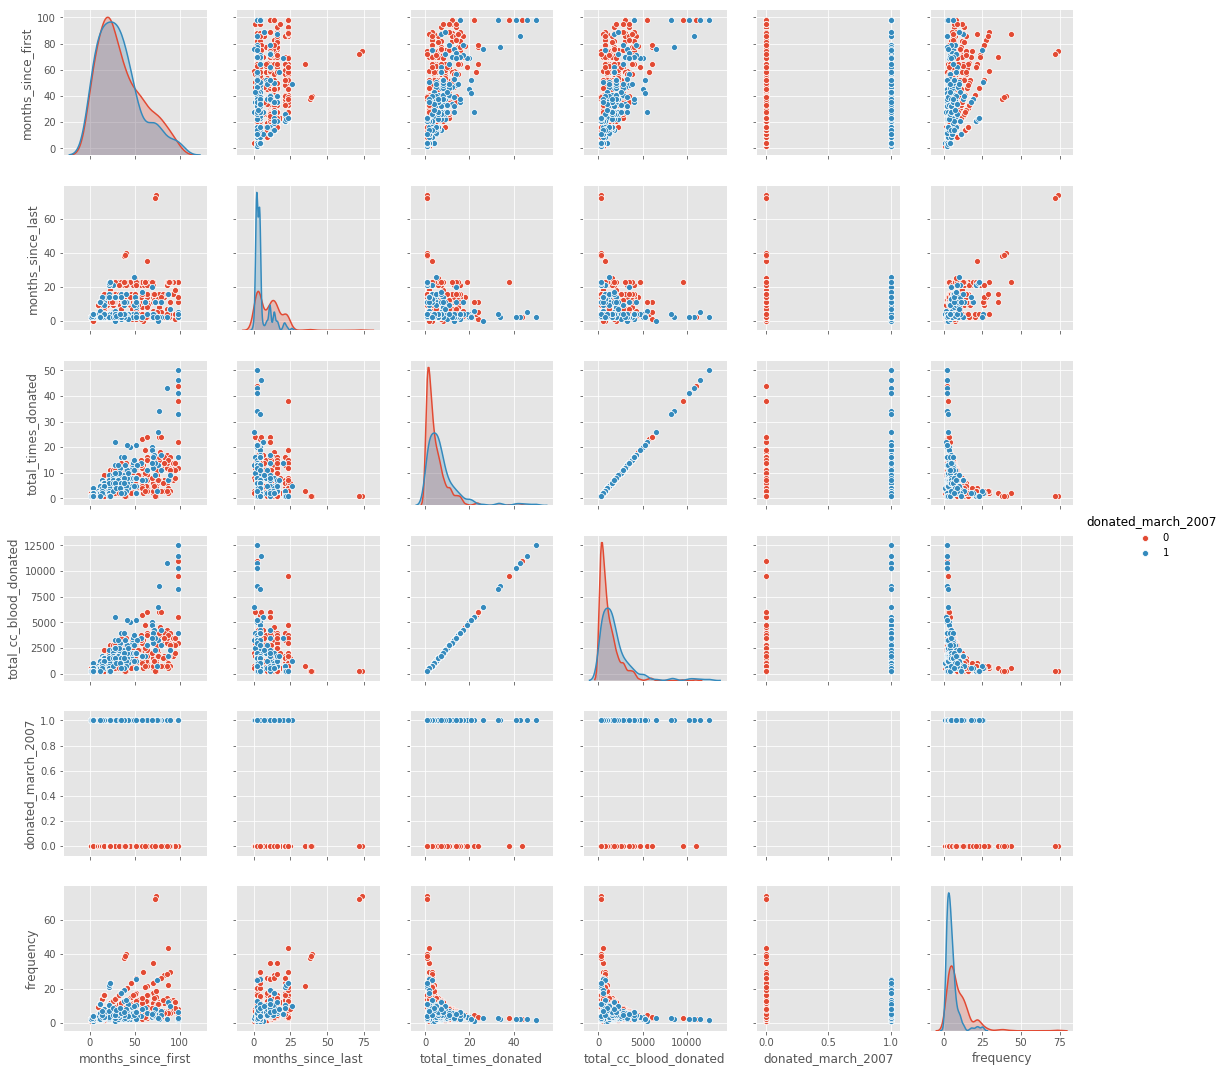

In [27]:
fig = sns.pairplot(tran, hue='donated_march_2007')
fig.savefig('capstone1_pairplot')

In [28]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
months_since_first        748 non-null int64
months_since_last         748 non-null int64
total_times_donated       748 non-null int64
total_cc_blood_donated    748 non-null int64
donated_march_2007        748 non-null int64
frequency                 748 non-null float64
dtypes: float64(1), int64(5)
memory usage: 35.1 KB
